<a href="https://colab.research.google.com/github/shashankgd/ML/blob/master/imagecomp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
!pip install opencv-python==3.4.2.16
!pip install opencv-contrib-python==3.4.2.16

In [0]:
import cv2
import os
import numpy as np
import argparse
import imutils
import glob
from matplotlib import pylab as plt
%matplotlib inline

imgs=[]
files = [f for f in os.listdir('.') if os.path.isfile(f)]
print(files)

def showimg(x,y='image'):
  plt.imshow(x)
  plt.title(y)

#reading images in grayscale format
image1 = cv2.imread('newtab.jpg',0)
image2 = cv2.imread('table3.jpg',0)
image3 = cv2.imread('table6.jpg',0)
image4 = cv2.imread('threshold1.jpg.jpg',0)
image5 = cv2.imread('threshold2.jpg.jpg',0)
image6 = cv2.imread('apple2.jpg',0)



Get counters for template matching

In [0]:
import cv2
import numpy as np

def unsharp_mask(img, blur_size = (9,9), imgWeight = 1.5, gaussianWeight = -0.5):
    gaussian = cv2.GaussianBlur(img, (5,5), 0)
    return cv2.addWeighted(img, imgWeight, gaussian, gaussianWeight, 0)

img_file = 'mewtab.jpg'
img = cv2.imread(img_file, cv2.IMREAD_COLOR)
img = cv2.blur(img, (5, 5))
img = unsharp_mask(img)
img = unsharp_mask(img)
img = unsharp_mask(img)

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)

thresh = cv2.adaptiveThreshold(s, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
_, contours, heirarchy = cv2.findContours(thresh.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = sorted(contours, key = cv2.contourArea, reverse = True)
#for cnt in cnts:
canvas_for_contours = thresh.copy()
cv2.drawContours(thresh, cnts[:-1], 0, (0,255,0), 3)
cv2.drawContours(canvas_for_contours, contours, 0, (0,255,0), 3)
showimg('Result', canvas_for_contours - thresh)
# cv2.imwrite("result.jpg", canvas_for_contours - thresh)
cv2.waitKey(0)

In [20]:
import numpy as np
import cv2

# load the image
image = cv2.imread("newtab.jpg", 1)

def is_contour_bad(c):
	# approximate the contour
	peri = cv2.arcLength(c, True)
	approx = cv2.approxPolyDP(c, 0.02 * peri, True)
 
# load the image, convert it to grayscale, blur it slightly,
# and threshold it
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY)[1]

# find contours in the thresholded image
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

# loop over the contours
for c in cnts:
	# compute the center of the contour
	M = cv2.moments(c)
	cX = int(M["m10"] / M["m00"])
	cY = int(M["m01"] / M["m00"])
 
	# draw the contour and center of the shape on the image
	cv2.drawContours(image, [c], -1, (0, 255, 0), 2)
	cv2.circle(image, (cX, cY), 7, (255, 255, 255), -1)
	cv2.putText(image, "center", (cX - 20, cY - 20),
		cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
 
	# show the image
	cv2.imshow("Image", image)
	cv2.waitKey(0)



  # # find the biggest countour (c) by the area
  # c = max(contours, key = cv2.contourArea)
  # x,y,w,h = cv2.boundingRect(c)

  # # draw the biggest contour (c) in green
  # cv2.rectangle(output,(x,y),(x+w,y+h),(0,255,0),2)
  # showimg(output)


# show the images
showimg(output)
cv2.waitKey(0)    

error: ignored

# New Section

wbd counters

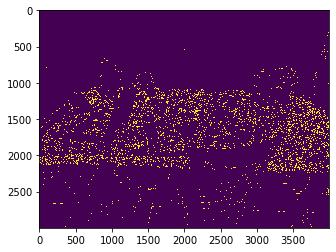

In [5]:
 
# load the image image, convert it to grayscale, and detect edges
template = cv2.imread('table1.jpg')
template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
template = cv2.Canny(template, 50, 200)
(tH, tW) = template.shape[:2]
showimg(template)

apple2.jpg does not match
== (0, 0) 5.222856369613282e-09


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


table1.jpg (5.2228563696132824e-17, (0, 0), 1.0)
== (0, 0) 1.0
table2.jpg (1e-08, (0, 0), 1.0)


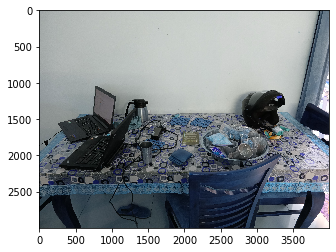

In [8]:

# loop over the images to find the template in
for imagePath in os.listdir('.'):
  threshold = []
  if os.path.isfile(imagePath):
    # load the image, convert it to grayscale, and initialize the
    # bookkeeping variable to keep track of the matched region
    image = cv2.imread(imagePath)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    found = None
  
    # loop over the scales of the image
    for scale in np.linspace(0.2, 1.0, 20)[::-1]:
      # resize the image according to the scale, and keep track
      # of the ratio of the resizing
      resized = imutils.resize(gray, width = int(gray.shape[1] * scale))
      r = gray.shape[1] / float(resized.shape[1])
  
      # if the resized image is smaller than the template, then break
      # from the loop
      if resized.shape[0] < tH or resized.shape[1] < tW:
        break

      # detect edges in the resized, grayscale image and apply template
		  # matching to find the template in the image
      edged = cv2.Canny(resized, 50, 200)
      result = cv2.matchTemplate(edged, template, cv2.TM_CCOEFF)
      (_, maxVal, _, maxLoc) = cv2.minMaxLoc(result)
  
      # check to see if the iteration should be visualized
      # if args.get("visualize", False):
        # draw a bounding box around the detected region
      clone = np.dstack([edged, edged, edged])
      clone = cv2.rectangle(clone, (maxLoc[0], maxLoc[1]), (maxLoc[0] + tW, maxLoc[1] + tH), (0, 0, 255), 2)
      showimg(clone)
      maxVal = maxVal/1e8
      # if we have found a new maximum correlation value, then update
      # the bookkeeping variable
      if found is None or maxVal > found[0]:
        found = (maxVal, maxLoc, r)
    if found == None:
      print(imagePath, 'does not match')
      continue
    if imagePath == template:
      threshold = maxVal / 2
    # unpack the bookkeeping variable and compute the (x, y) coordinates
    # of the bounding box based on the resized ratio
    (_, maxLoc, r) = found
    (startX, startY) = (int(maxLoc[0] * r), int(maxLoc[1] * r))
    (endX, endY) = (int((maxLoc[0] + tW) * r), int((maxLoc[1] + tH) * r))
  
    # draw a bounding box around the detected result and display the image
    image = cv2.rectangle(image, (startX, startY), (endX, endY), (0, 0, 255), 2)
    print(imagePath, found)
    showimg(image)

  else:
    pass

# New Section

**feature matching**

0 35590 35590 34526


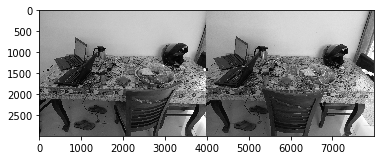

In [0]:

cv2.face.LBPHFaceRecognizer_create() 

#finding out the keypoints and their descriptors
sift = cv2.xfeatures2d.SIFT_create()
kp1, ds1 = sift.detectAndCompute(image1,None)
kp2, ds2 = sift.detectAndCompute(image2,None)
kp3, ds3 = sift.detectAndCompute(image3,None)
kp4, ds4 = sift.detectAndCompute(image4,None)
kp5, ds5 = sift.detectAndCompute(image5,None)
kp6, ds6 = sift.detectAndCompute(image6,None)


#matching the descriptors from both the images 
bf = cv2.BFMatcher(cv2.NORM_L1,crossCheck=False)
matches = bf.match(ds1,ds2)
matches3 = bf.match(ds1,ds3)
matches4 = bf.match(ds1,ds4)
matches6 = bf.match(ds1,ds6)

# # Sort them in the order of their distance.
# matches = sorted(matches, key = lambda x:x.distance)

#selecting only the good features
def getgm(matches):
  good_matches = []
  for m in matches:
      if m.distance < 0.7:
          good_matches.append(m)
good_matches = getgm(matches) 
good_matches3 = getgm(matches2) 
good_matches4 = getgm(matches3) 
good_matches6 = getgm(matches4) 


image7 = cv2.drawMatches(image1,kp1,image2,kp2,good_matches[:10],image2, flags = 2)
image8 = cv2.drawMatches(image1,kp1,image3,kp3,good_matches3[:10],image3, flags = 2)

image9 = cv2.drawMatches(image1,kp1,image4,kp4,good_matches4[:10],image4, flags = 2)
image10 = cv2.drawMatches(image1,kp1,image6,kp6,good_matches6[:10],image6, flags = 2)

plt.imshow(image7)
plt.imshow(image8)
plt.imshow(image9)
plt.imshow(image10)

print(len(good_matches), len(matches), len(kp1), len(kp2))